In [1]:
from models import *
from landmarks import *
from import_dataset import *
from utils import *
import random
import time

In [64]:
my_graph = ca_undirected('datasets-2/CA-GrQc.txt')
wc = weak_conns(my_graph)

my_graph = sorted(split_graph(my_graph, wc), key=lambda x: x.num_vertices)[-1]

In [69]:
START_VER, END_VER = random.sample(tuple(my_graph.get_all_vertices()), 2)
print(START_VER, END_VER)

t = time.time_ns()
tree = get_shortest_path_lengths(my_graph, START_VER, my_graph.get_all_vertices())
t = time.time_ns() - t

exact_len = tree[END_VER]
print(f"Exact method: {t} s. - {exact_len}")

def foo(implementation, count, method):
    land = implementation(my_graph, count, method)
    return land.distance(START_VER, END_VER)

22377 23481
Exact method: 15390100 s. - 5


In [83]:
my_graph.num_vertices

4158

# Basic

In [84]:
LANDMARKS_NUM = 3

x_landmarks = []

y_basic_random_time = []
y_basic_degree_time = []
y_basic_coverage_time = []

y_basic_random_r = []
y_basic_degree_r = []
y_basic_coverage_r = []

for LANDMARKS_NUM in (i**2 for i in range(20)):
    x_landmarks.append(LANDMARKS_NUM)

    print(">>> LANDMARKS_NUM", LANDMARKS_NUM)

    t = time.time_ns()
    path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.RANDOM)
    t = time.time_ns() - t

    y_basic_random_time.append(t)
    y_basic_random_r.append(path-exact_len)


    print(f"BASIC, random method: {t} s. {path}")

    t = time.time_ns()
    path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
    t = time.time_ns() - t

    y_basic_degree_time.append(t)
    y_basic_degree_r.append(path-exact_len)

    print(f"BASIC, max degree method: {t} s. {path}")

    t = time.time_ns()
    path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.BEST_COVERAGE)
    t = time.time_ns() - t

    y_basic_coverage_time.append(t)
    y_basic_coverage_r.append(path-exact_len)

    print(f"BASIC, best coverage: {t} s. {path}")

>>> LANDMARKS_NUM 0
BASIC, random method: 0 s. inf
BASIC, max degree method: 3999400 s. inf
BASIC, best coverage: 724195700 s. inf
>>> LANDMARKS_NUM 1
BASIC, random method: 8002200 s. 10
BASIC, max degree method: 4000600 s. 6
BASIC, best coverage: 799642000 s. 5
>>> LANDMARKS_NUM 4
BASIC, random method: 16009300 s. 9
BASIC, max degree method: 20120400 s. 6
BASIC, best coverage: 731189000 s. 7
>>> LANDMARKS_NUM 9
BASIC, random method: 42118400 s. 8
BASIC, max degree method: 40911200 s. 5
BASIC, best coverage: 820087300 s. 5
>>> LANDMARKS_NUM 16
BASIC, random method: 72412300 s. 7
BASIC, max degree method: 70614600 s. 5
BASIC, best coverage: 950050800 s. 5
>>> LANDMARKS_NUM 25
BASIC, random method: 111966300 s. 7
BASIC, max degree method: 108187800 s. 5
BASIC, best coverage: 1105228000 s. 5
>>> LANDMARKS_NUM 36
BASIC, random method: 158128300 s. 7
BASIC, max degree method: 162478100 s. 5
BASIC, best coverage: 1172866600 s. 5
>>> LANDMARKS_NUM 49
BASIC, random method: 215273600 s. 6
BASIC

Traceback (most recent call last):
  File "C:\Users\liss-\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\liss-\AppData\Local\Temp\ipykernel_8460\4284590179.py", line 29, in <cell line: 13>
    path = foo(LandmarksBasic, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
  File "C:\Users\liss-\AppData\Local\Temp\ipykernel_8460\846237477.py", line 12, in foo
    land = implementation(my_graph, count, method)
  File "C:\Users\liss-\PycharmProjects\pythonProject\landmarks.py", line 110, in __init__
    self._prepare(graph)
  File "C:\Users\liss-\PycharmProjects\pythonProject\landmarks.py", line 114, in _prepare
    self._distances[landmark] = get_shortest_path_lengths(
  File "C:\Users\liss-\PycharmProjects\pythonProject\utils.py", line -1, in get_shortest_path_lengths
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Tra

# Soc wiki

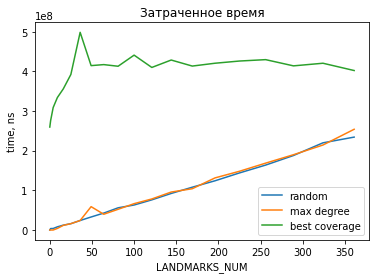

In [41]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_basic_random_time, label="random")
plt.plot(x_landmarks, y_basic_degree_time, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_time, label="best coverage")
plt.title("Затраченное время (soc-wiki)")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

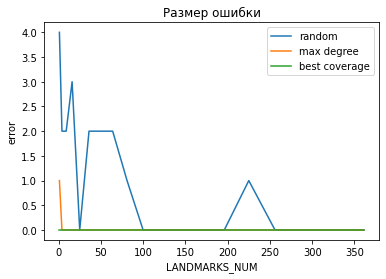

In [42]:
plt.plot(x_landmarks, y_basic_random_r, label="random")
plt.plot(x_landmarks, y_basic_degree_r, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# CA

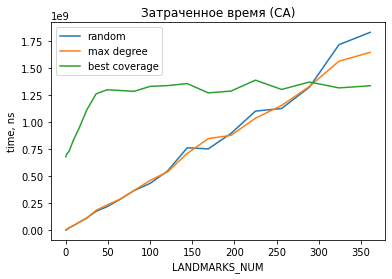

In [71]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_basic_random_time, label="random")
plt.plot(x_landmarks, y_basic_degree_time, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_time, label="best coverage")
plt.title("Затраченное время (CA)")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

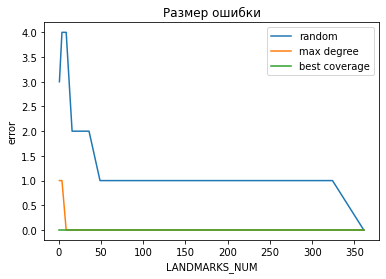

In [72]:
plt.plot(x_landmarks, y_basic_random_r, label="random")
plt.plot(x_landmarks, y_basic_degree_r, label="max degree")
plt.plot(x_landmarks, y_basic_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# LCA

In [43]:
LANDMARKS_NUM = 3

x_landmarks = []

y_lca_random_time = []
y_lca_degree_time = []
y_lca_coverage_time = []

y_lca_random_r = []
y_lca_degree_r = []
y_lca_coverage_r = []

for LANDMARKS_NUM in (i**2 for i in range(20)):
    x_landmarks.append(LANDMARKS_NUM)

    print(">>> LANDMARKS_NUM", LANDMARKS_NUM)

    t = time.time_ns()
    path = foo(LandmarksLCA, LANDMARKS_NUM, SelectLandmarksMethod.RANDOM)
    t = time.time_ns() - t

    y_lca_random_time.append(t)
    y_lca_random_r.append(path-exact_len)


    print(f"BASIC, random method: {t} s. {path}")

    t = time.time_ns()
    path = foo(LandmarksLCA, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
    t = time.time_ns() - t

    y_lca_degree_time.append(t)
    y_lca_degree_r.append(path-exact_len)

    print(f"BASIC, max degree method: {t} s. {path}")

    t = time.time_ns()
    path = foo(LandmarksLCA, LANDMARKS_NUM, SelectLandmarksMethod.BEST_COVERAGE)
    t = time.time_ns() - t

    y_lca_coverage_time.append(t)
    y_lca_coverage_r.append(path-exact_len)

    print(f"BASIC, best coverage: {t} s. {path}")

>>> LANDMARKS_NUM 0
BASIC, random method: 0 s. inf
BASIC, max degree method: 0 s. inf
BASIC, best coverage: 269598700 s. inf
>>> LANDMARKS_NUM 1
BASIC, random method: 0 s. 5
BASIC, max degree method: 0 s. 5
BASIC, best coverage: 343218500 s. 4
>>> LANDMARKS_NUM 4
BASIC, random method: 0 s. 6
BASIC, max degree method: 0 s. 4
BASIC, best coverage: 352861400 s. 4
>>> LANDMARKS_NUM 9
BASIC, random method: 8090800 s. 5
BASIC, max degree method: 0 s. 4
BASIC, best coverage: 337938400 s. 4
>>> LANDMARKS_NUM 16
BASIC, random method: 8031000 s. 5
BASIC, max degree method: 12081500 s. 4
BASIC, best coverage: 353249400 s. 4
>>> LANDMARKS_NUM 25
BASIC, random method: 20127300 s. 5
BASIC, max degree method: 12119800 s. 4
BASIC, best coverage: 386283000 s. 4
>>> LANDMARKS_NUM 36
BASIC, random method: 29286100 s. 5
BASIC, max degree method: 22550200 s. 4
BASIC, best coverage: 397272500 s. 4
>>> LANDMARKS_NUM 49
BASIC, random method: 28775700 s. 5
BASIC, max degree method: 41931700 s. 4
BASIC, best co

# wiki

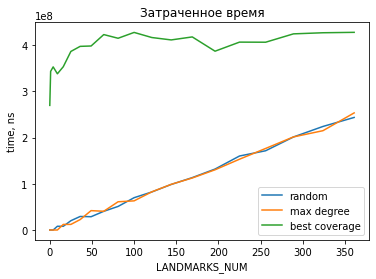

In [44]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_lca_random_time, label="random")
plt.plot(x_landmarks, y_lca_degree_time, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_time, label="best coverage")
plt.title("Затраченное время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

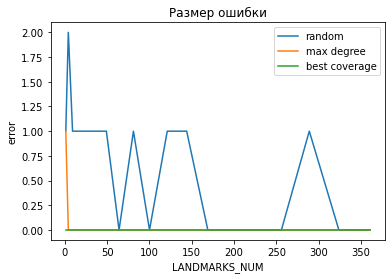

In [45]:
plt.plot(x_landmarks, y_lca_random_r, label="random")
plt.plot(x_landmarks, y_lca_degree_r, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# CA

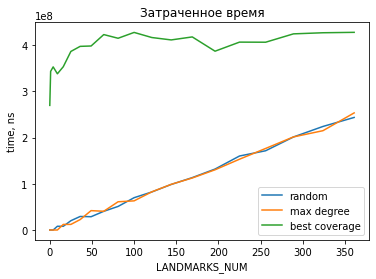

In [73]:
from matplotlib import pyplot as plt

plt.plot(x_landmarks, y_lca_random_time, label="random")
plt.plot(x_landmarks, y_lca_degree_time, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_time, label="best coverage")
plt.title("Затраченное время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.legend()
plt.show()

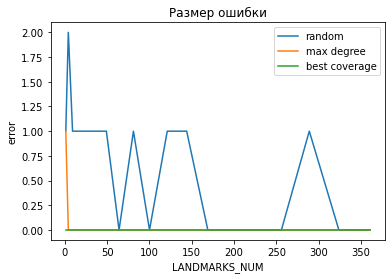

In [74]:
plt.plot(x_landmarks, y_lca_random_r, label="random")
plt.plot(x_landmarks, y_lca_degree_r, label="max degree")
plt.plot(x_landmarks, y_lca_coverage_r, label="best coverage")
plt.legend()
plt.title("Размер ошибки")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("error")
plt.show()

# Comapre
## wiki

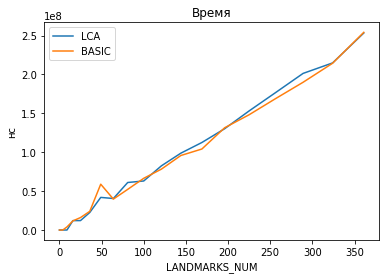

In [46]:
plt.plot(x_landmarks, y_lca_degree_time, label="LCA")
plt.plot(x_landmarks, y_basic_degree_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

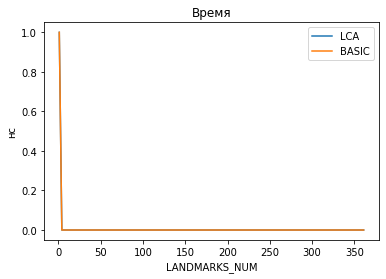

In [49]:
plt.plot(x_landmarks[1:], y_lca_degree_r[1:], label="LCA")
plt.plot(x_landmarks[1:], y_basic_degree_r[1:], label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

## CA

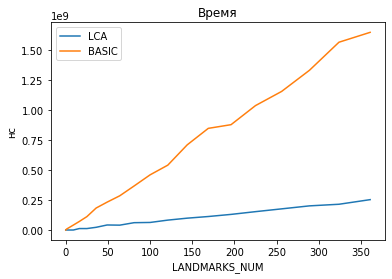

In [75]:
plt.plot(x_landmarks, y_lca_degree_time, label="LCA")
plt.plot(x_landmarks, y_basic_degree_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

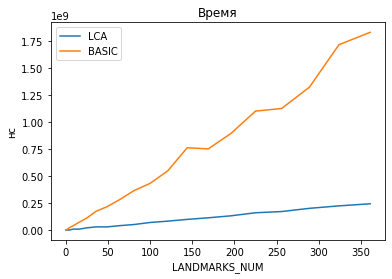

In [77]:
plt.plot(x_landmarks, y_lca_random_time, label="LCA")
plt.plot(x_landmarks, y_basic_random_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

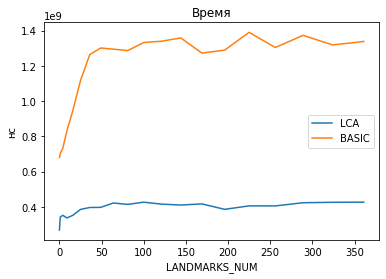

In [82]:
plt.plot(x_landmarks, y_lca_coverage_time, label="LCA")
plt.plot(x_landmarks, y_basic_coverage_time, label="BASIC")
plt.legend()
plt.title("Время")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

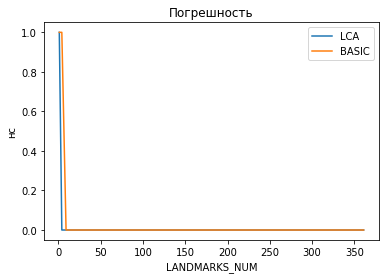

In [76]:
plt.plot(x_landmarks[1:], y_lca_degree_r[1:], label="LCA")
plt.plot(x_landmarks[1:], y_basic_degree_r[1:], label="BASIC")
plt.legend()
plt.title("Погрешность")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("нс")
plt.show()

# Select landmarks

In [95]:
x_landmarks_num = []
y_random = []
y_degree = []
y_coverage = []

for LANDMARKS_NUM in (i for i in range(1, 400, 10)):
    print(LANDMARKS_NUM)
    x_landmarks_num.append(LANDMARKS_NUM)

    t = time.time_ns()
    select_landmarks(my_graph, LANDMARKS_NUM, SelectLandmarksMethod.RANDOM)
    t = time.time_ns() - t

    y_random.append(t)

    t = time.time_ns()
    select_landmarks(my_graph, LANDMARKS_NUM, SelectLandmarksMethod.MAX_DEGREE)
    t = time.time_ns() - t

    y_degree.append(t)

    t = time.time_ns()
    select_landmarks(my_graph, LANDMARKS_NUM, SelectLandmarksMethod.BEST_COVERAGE)
    t = time.time_ns() - t

    y_coverage.append(t)


1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391


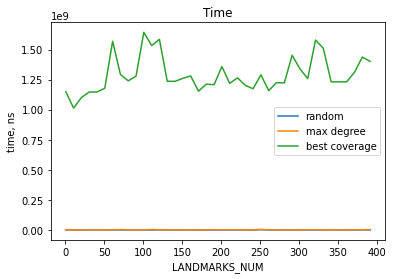

In [98]:
plt.plot(x_landmarks_num, y_random, label="random")
plt.plot(x_landmarks_num, y_degree, label="max degree")
plt.plot(x_landmarks_num, y_coverage, label="best coverage")
plt.legend()
plt.title("Time")
plt.xlabel("LANDMARKS_NUM")
plt.ylabel("time, ns")
plt.show()